# UCI Credit Card Default Dataset. 
(https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

# *The following project has been solved using the Support Vector Machines
# *Project Guide:
               *Importing of Packages
               *Exploratory Data Analysis
               *Resampling
               *Train-Test Split
               *Deploying of SVM using SVC()
               *Hyperparameter Tuning

# First we import all the packages. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("UCI_Credit_Card.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.shape

(30000, 24)

In [8]:
df = df.rename(columns={'default.payment.next.month': 'Default'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [10]:
df['SEX'].unique()
#This has only two values(Male and Female) as (2,1)

array([2, 1], dtype=int64)

In [11]:
#According to the condtions set, the data for EDUCATION is supposed to be
#1-Graduate School 2-University 3-High School 4-Others
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [12]:
#we see that the EDUCATION columns has more than the said 4 different types of data type. 
#we want to see how many of them have '0' as the value as that signifies the lack of value
len(df.loc[df['EDUCATION']==0])

14

In [13]:
#MARRIAGE columns is supposed to have 3 different types of data
#1-Married 2-Single 3-Others
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [14]:
#Marriage has a different data type other than the 3 types
#we want to see how many of them have '0' as the value as that signifies the lack of value
len(df.loc[df['MARRIAGE']==0])

54

In [15]:
#putting both the marriage missing values and the education missing values together
len(df.loc[(df['EDUCATION']==0)|(df['MARRIAGE']==0)])

68

In [16]:
#the value are added and not overlapping
#Since 68/30000 values, we can ignore it as ~0.22% (less than 1%)

df_new=df.loc[(df['EDUCATION']!=0)&(df['MARRIAGE']!=0)]

In [17]:
len(df_new)

29932

In [18]:
#since SVM does not work very well with such large data, we will resample this data---downsampling
df_no_default=df_new[df_new['Default']==0]
df_default=df_new[df_new['Default']==1]

In [19]:
df_no_default_downsampled=resample(df_no_default,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)

In [20]:
df_default_downsampled=resample(df_default,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)

In [21]:
df_downsample=pd.concat([df_no_default_downsampled,df_default_downsampled])

In [22]:
len(df_downsample)

2000

In [25]:
X=df_downsample.iloc[:,:-1]

In [26]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000.0,2,3,1,28,0,0,0,0,-2,...,50000.0,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0
4678,170000.0,1,3,1,29,0,0,0,0,0,...,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0
16004,180000.0,2,2,1,29,0,0,0,0,0,...,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0
22974,210000.0,2,2,2,32,-2,-2,-2,-2,-2,...,410.0,0.0,0.0,0.0,979.0,412.0,0.0,0.0,0.0,0.0
17535,190000.0,2,3,1,45,0,0,0,0,0,...,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0


In [29]:
y=df_downsample['Default']

In [30]:
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: Default, dtype: int64

In [31]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [33]:
X_encoded=pd.get_dummies(X,columns=['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [34]:
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000.0,28,100143.0,50456.0,50000.0,0.0,0.0,0.0,2500.0,1000.0,...,0,1,0,0,0,0,0,0,0,0
4678,170000.0,29,165027.0,168990.0,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,...,0,0,0,1,0,0,0,0,0,0
16004,180000.0,29,25781.0,26000.0,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,...,0,0,0,1,0,0,0,0,0,0
22974,210000.0,32,355.0,975.0,410.0,0.0,0.0,0.0,979.0,412.0,...,0,1,0,0,0,0,0,0,0,0
17535,190000.0,45,76433.0,78472.0,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,...,0,0,0,1,0,0,0,0,0,0


# Splitting the data using train test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,random_state=42)

In [36]:
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

# Deploying the Support Vector Machine Algorithm

In [37]:
clf_svm=SVC(random_state=42)

In [39]:
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

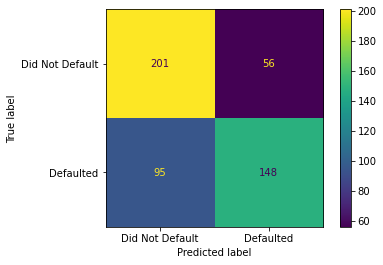

In [40]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     display_labels=['Did Not Default','Defaulted'])

In [42]:
y_test.value_counts()

0    257
1    243
Name: Default, dtype: int64

From the above confusion matrix we see that the number of people classified to have defaulted is 148/243~61% which isn't the best.
So we will tune the hyperparameters using GridSearchCV to get the best parameters and run the ML model again

In [44]:
param_grid=[{'C':[0.5,1,10,100],
            'gamma':['scale',1,0.1,0.001,0.0001],
            'kernel':['rbf']}]
optimal_params=GridSearchCV(SVC(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

In [47]:
optimal_params.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [48]:
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.7026666666666668


In [49]:
clf_svm=SVC(random_state=42,C=100,gamma=0.001)

In [50]:
clf_svm.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

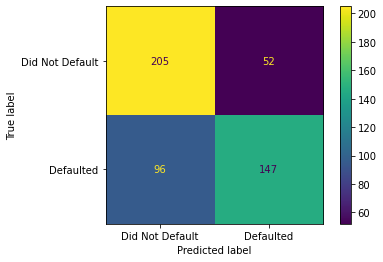

In [51]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     display_labels=['Did Not Default','Defaulted'])

The following code change does make a small change. The percentage classified to have not defaulted went up 201 to 205. 

# THE END